In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [3]:
#sns.color_palette(as_cmap=True)

In [7]:
df = pd.read_excel('pig_quant_trim.xlsx')

In [8]:
df

,Pig,Adenine,Cytosine,Guanine,Thymine,Uracil,Cytidine,Uridine,Hypoxanthine,Adenosine,Guanosine,Inosine,Deoxycytidine,Aspartate,Asparagine
0,1,0.015851,1.394469,1.081006,0.593857,0.516134,2.323816,8.654825,18.264247,0.006627,0.358623,1.141002,0.473532,4.228500,40.562418
1,2,0.011922,6.097341,0.796126,0.369791,0.324978,2.395935,4.530136,19.766729,0.006627,0.669788,2.846912,0.406436,4.422927,25.960404
2,3,0.015851,2.464146,1.238670,0.346990,0.367071,2.599481,4.450372,24.017608,0.006627,0.767703,5.616288,0.538578,5.364774,29.058493


In [48]:
plot_order = df.mean().sort_values(ascending=False).index.values
mask = (plot_order != 'Aspartate') & (plot_order != 'Asparagine') & (plot_order != 'Pig')
plot_order = plot_order[mask]

In [12]:
df_melt = df.melt(id_vars=['Pig'], value_name='Concentration', var_name='Metabolite')

In [23]:
# df_melt

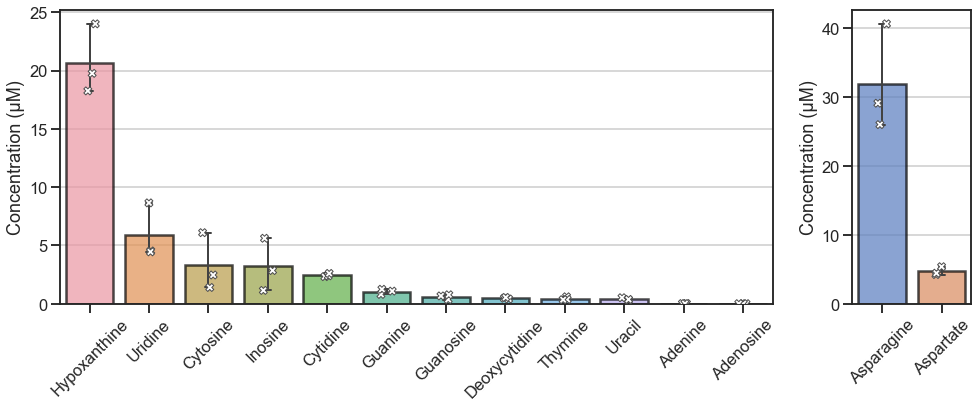

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [6, 1]})


mask = (df_melt['Metabolite'] != 'Aspartate') & (df_melt['Metabolite'] != 'Asparagine')
g1 = sns.barplot(ax=ax1, data=df_melt[mask], x='Metabolite', y='Concentration', capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7, order=plot_order)
g1_p = sns.stripplot(ax=ax1, data=df_melt[mask], x='Metabolite', y='Concentration', jitter=True, dodge=True, linewidth=1, color='1', edgecolor='.3', marker='X', s=8, order=plot_order)

g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g1.set_ylabel('Concentration (μM)');
g1.grid(True, axis='y')
g1.set_xlabel(None);


g2 = sns.barplot(ax=ax2, data=df_melt[~mask], x='Metabolite', y='Concentration', capsize=.1, errwidth=2, edgecolor='black', linewidth=2.5, alpha=0.7, order=['Asparagine', 'Aspartate'])
g2_p = sns.stripplot(ax=ax2, data=df_melt[~mask], x='Metabolite', y='Concentration', jitter=True, dodge=True, linewidth=1, color='1', edgecolor='.3', marker='X', s=8, order=['Asparagine', 'Aspartate'])

g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
g2.set_ylabel('Concentration (μM)');
g2.grid(True, axis='y')
g2.set_xlabel(None);


fig.tight_layout()
fig.savefig('conc_plot.pdf')